In [1]:
##1 read and normalize the data
##2 generate W for every query point
##3 no training is involved,dorectly make predictions using closed form solution
##4 find the best value of tau

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
dfx = pd.read_csv("./weightedX.csv")
dfy = pd.read_csv("./weightedY.csv")

In [6]:
X = dfx.values
Y = dfy.values

print(X.shape, Y.shape)

(99, 1) (99, 1)


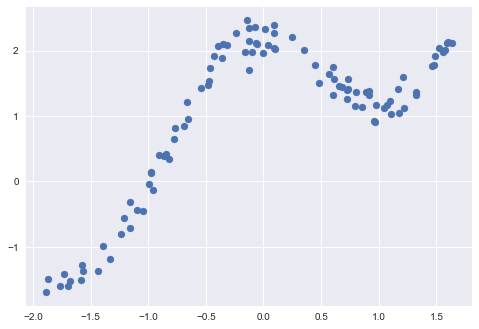

In [8]:
X = (X-X.mean())/X.std()

plt.style.use('seaborn')
plt.scatter(X, Y)
plt.show()

In [9]:
## find W diagonal matrix

In [12]:
print(np.mat(np.eye(5)))

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [16]:
def getW(query_point, X, tau):
    m = X.shape[0]
    W = np.mat(np.eye(m))
    
    for i in range(m):
        xi = X[i]
        x = query_point
        W[i,i] = np.exp(np.dot(xi-x, (xi-x).T)/(-2*tau*tau))
        
    return W

In [21]:
X = np.mat(X)
Y = np.mat(Y)

W = getW(-1, X, 1)
print(W.shape, W)

(99, 99) [[0.81327022 0.         0.         ... 0.         0.         0.        ]
 [0.         0.98353311 0.         ... 0.         0.         0.        ]
 [0.         0.         0.81193405 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.59936711 0.         0.        ]
 [0.         0.         0.         ... 0.         0.2758226  0.        ]
 [0.         0.         0.         ... 0.         0.         0.08496804]]


In [28]:
def predict(X,Y,query_x,tau):
    ones = np.ones((X.shape[0],1))
    X_ = np.hstack((X, ones))
    
    qx = np.mat([query_x, 1])
    
    W = getW(query_x, X_, tau)
    
    theta = np.linalg.pinv(X_.T*(W*X_))*(X_.T*(W*Y))
    
    pred = np.dot(qx, theta)
    
    return theta, pred

In [29]:
theta, pred = predict(X,Y,1.0,1.0)

In [30]:
print(theta.shape, theta, pred)

(2, 1) [[0.14069504]
 [1.45348191]] [[1.59417694]]


In [31]:
## visualize predictions , analyse effect effect of tau

In [34]:
def plotPrediction(tau):
    X_test = np.linspace(-2,2,20)
    Y_test = []
    
    for qx in X_test:
        theta, pred = predict(X,Y, qx, tau)
        
        Y_test.append(pred[0][0])
        
    Y_test = np.array(Y_test)
    
    XO = np.array(X)
    YO = np.array(Y)
    
    plt.scatter(XO,YO)
    plt.scatter(X_test, Y_test, color='red')
    plt.show()

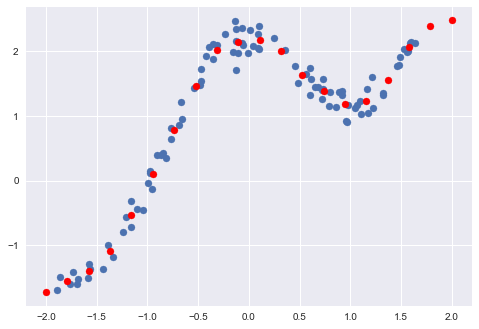

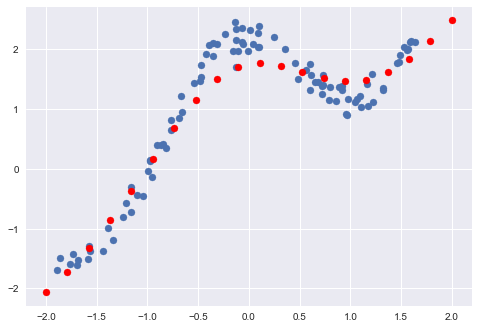

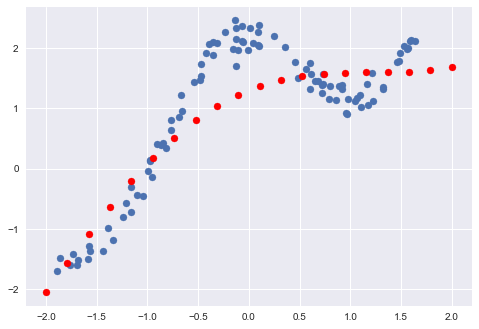

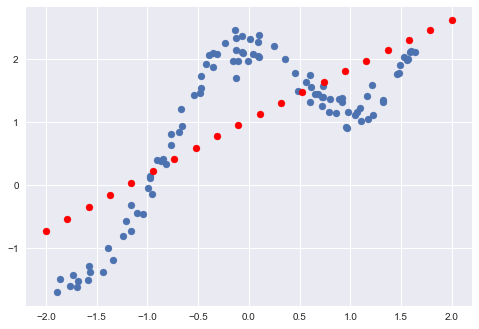

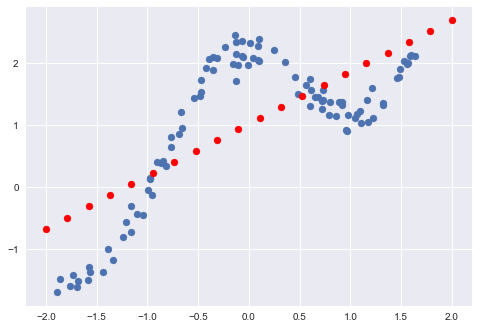

In [38]:
taus = [0.1,0.5,1,5,10]
for t in taus:
    plotPrediction(t)